In [79]:
import umap
from rdkit import Chem
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit import RDLogger
import pandas as pd
from rdkit.Chem import AllChem

In [ ]:
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
# suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
# drugbank = [mol for mol in suppl if mol]
mtor = pd.read_csv(
    '../data/chembl_mtor_ic50.csv',
    # on_bad_lines='skip',
    sep=';'
)

In [12]:
mtor = mtor.dropna(subset=['Smiles'])

In [13]:
mtor = mtor.dropna(subset=['pChEMBL Value'])

In [14]:
mtor

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1773577,NaN,0,443.49,0.0,3.65,40,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
3,CHEMBL1773580,NaN,0,443.49,0.0,3.65,43,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
5,CHEMBL1773601,NaN,0,453.55,0.0,4.73,60,COc1ccc(S(=O)(=O)Nc2cccc(-c3ccc4nc(NC(C)=O)sc4...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
7,CHEMBL1945792,NaN,0,312.33,0.0,1.84,21,O=c1[nH]c2ncc(-c3ccc(O)cc3)nc2n1C1CCOCC1,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1944561,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2011,NaN
8,CHEMBL1945950,NaN,0,366.47,0.0,3.59,39,CC(C)(O)c1ccc(-c2cnc3[nH]c(=O)n(CC4CCCCC4)c3n2...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1944561,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,CHEMBL2331680,RG-7603,1,452.56,0.0,2.27,GDC-0349,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4052688,1,Scientific Literature,Bioorg Med Chem Lett,2017,NaN
4589,CHEMBL4097625,NaN,0,563.61,1.0,3.59,(S)-C5,COc1ncc(-c2ccc3ncn([C@H]4CCN(C(=O)C5CC5)C4)c(=...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4000150,1,Scientific Literature,Bioorg Med Chem,2015,NaN
4590,CHEMBL4288258,NaN,0,478.86,0.0,3.50,31,COc1ncc(-c2ccc3ncc(Cl)c(=O)n3c2)cc1NS(=O)(=O)c...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN
4593,CHEMBL4246563,NaN,0,407.43,0.0,4.92,16b,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL4229497,1,Scientific Literature,Bioorg Med Chem,2018,NaN


In [16]:
mqns = []
for smi in mtor['Smiles']:
    mqns.append(rdMolDescriptors.MQNs_(Chem.MolFromSmiles(smi)))

Now we'll normalize mqn vals

In [21]:
mqns = pd.DataFrame(mqns)

In [22]:
mqns

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,19,1,0,0,0,2,0,2,3,3,...,0,0,1,3,0,0,0,0,2,1
1,19,1,0,0,0,2,0,2,3,3,...,0,0,1,3,0,0,0,0,2,1
2,22,0,0,0,0,2,0,2,1,4,...,0,0,1,3,0,0,0,0,2,1
3,16,0,0,0,0,0,0,0,4,2,...,0,0,1,3,0,0,0,0,2,1
4,21,0,0,0,0,0,0,0,4,2,...,0,0,1,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,24,0,0,0,0,0,0,2,4,1,...,0,1,0,4,0,0,0,0,2,1
3927,28,1,0,0,0,1,0,1,4,5,...,1,0,1,4,0,0,0,0,2,1
3928,20,2,1,0,0,1,0,1,3,4,...,0,0,0,4,0,0,0,0,2,1
3929,25,0,0,0,0,0,0,1,2,2,...,0,0,1,4,0,0,0,0,4,2


In [32]:
scaler = MinMaxScaler()
minmax_mqns = scaler.fit_transform(mqns)
minmax_mqns = pd.DataFrame(minmax_mqns, columns=mqns.columns)

In [33]:
minmax_mqns

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.148936,0.125,0.0,0.0,0.0,0.666667,0.0,0.285714,0.214286,0.142857,...,0.0,0.000000,0.25,0.285714,0.0,0.0,0.0,0.0,0.166667,0.090909
1,0.148936,0.125,0.0,0.0,0.0,0.666667,0.0,0.285714,0.214286,0.142857,...,0.0,0.000000,0.25,0.285714,0.0,0.0,0.0,0.0,0.166667,0.090909
2,0.212766,0.000,0.0,0.0,0.0,0.666667,0.0,0.285714,0.071429,0.190476,...,0.0,0.000000,0.25,0.285714,0.0,0.0,0.0,0.0,0.166667,0.090909
3,0.085106,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.285714,0.095238,...,0.0,0.000000,0.25,0.285714,0.0,0.0,0.0,0.0,0.166667,0.090909
4,0.191489,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.285714,0.095238,...,0.0,0.000000,0.25,0.285714,0.0,0.0,0.0,0.0,0.166667,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926,0.255319,0.000,0.0,0.0,0.0,0.000000,0.0,0.285714,0.285714,0.047619,...,0.0,0.333333,0.00,0.428571,0.0,0.0,0.0,0.0,0.166667,0.090909
3927,0.340426,0.125,0.0,0.0,0.0,0.333333,0.0,0.142857,0.285714,0.238095,...,0.5,0.000000,0.25,0.428571,0.0,0.0,0.0,0.0,0.166667,0.090909
3928,0.170213,0.250,0.5,0.0,0.0,0.333333,0.0,0.142857,0.214286,0.190476,...,0.0,0.000000,0.00,0.428571,0.0,0.0,0.0,0.0,0.166667,0.090909
3929,0.276596,0.000,0.0,0.0,0.0,0.000000,0.0,0.142857,0.142857,0.095238,...,0.0,0.000000,0.25,0.428571,0.0,0.0,0.0,0.0,0.333333,0.181818


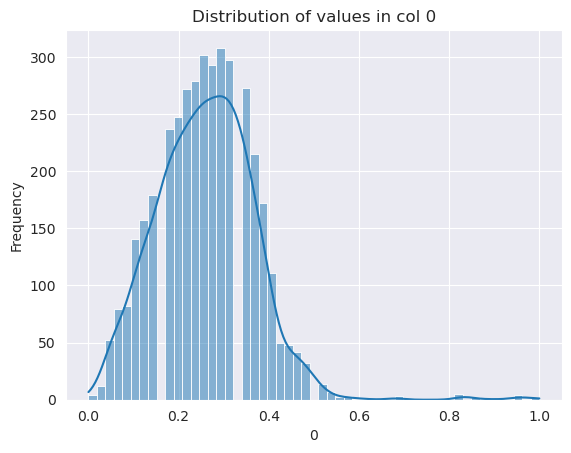

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of values for each column in minmax_mqns
sns.histplot(minmax_mqns[0], kde=True)
plt.title(f'Distribution of values in col 0')
# plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [29]:
normalized_mqns = preprocessing.normalize(mqns, axis=0)
normalized_mqns

array([[0.0122335 , 0.01748476, 0.        , ..., 0.        , 0.0114081 ,
        0.01060057],
       [0.0122335 , 0.01748476, 0.        , ..., 0.        , 0.0114081 ,
        0.01060057],
       [0.0141651 , 0.        , 0.        , ..., 0.        , 0.0114081 ,
        0.01060057],
       ...,
       [0.01287737, 0.03496952, 0.04677803, ..., 0.        , 0.0114081 ,
        0.01060057],
       [0.01609671, 0.        , 0.        , ..., 0.        , 0.0228162 ,
        0.02120115],
       [0.01287737, 0.        , 0.        , ..., 0.        , 0.0114081 ,
        0.01060057]])

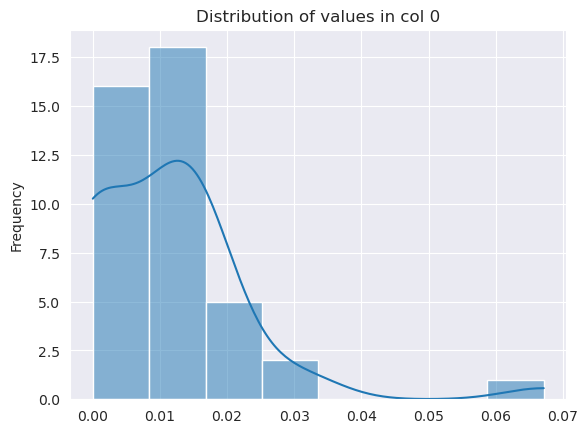

In [36]:
sns.histplot(normalized_mqns[0], kde=True)
plt.title(f'Distribution of values in col 0')
# plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

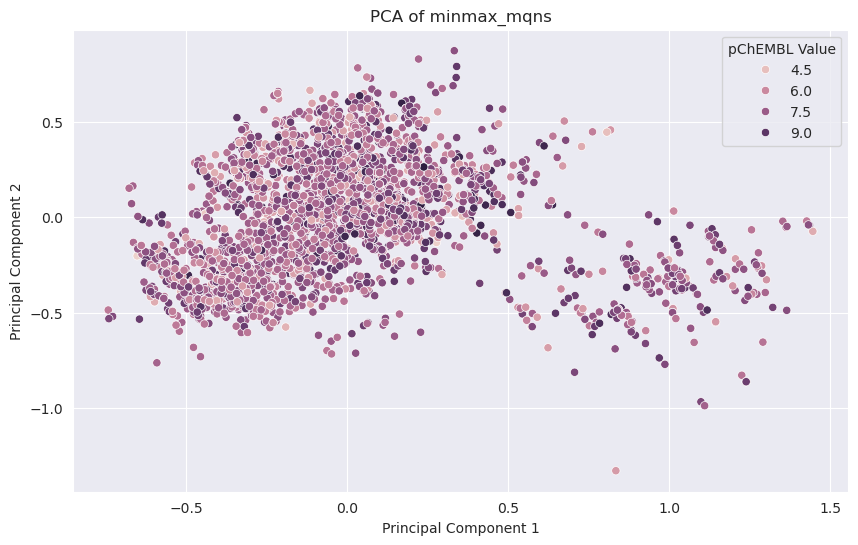

In [42]:
pca = PCA(n_components=2)
pca_mqns = pca.fit_transform(minmax_mqns)
pca_df = pd.DataFrame(data=pca_mqns, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue = mtor['pChEMBL Value'])
plt.title('PCA of minmax_mqns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

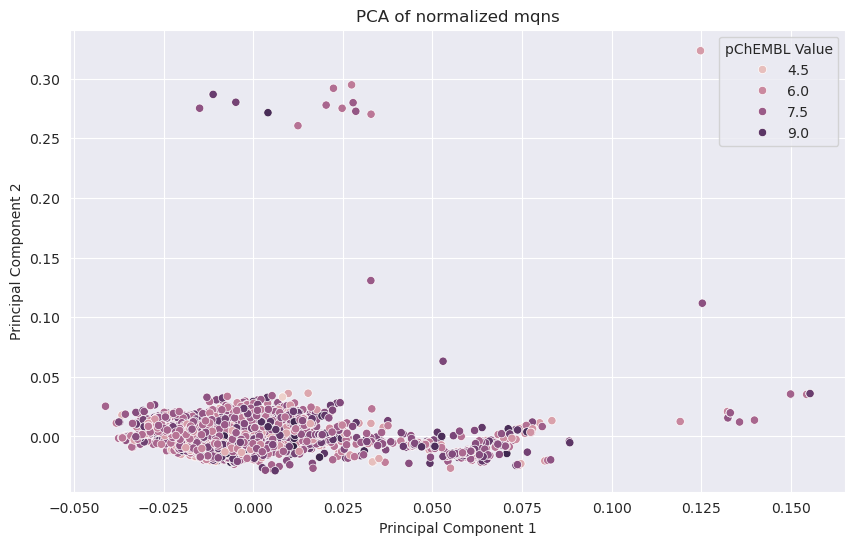

In [43]:
pca = PCA(n_components=2)
pca_mqns = pca.fit_transform(normalized_mqns)
pca_df = pd.DataFrame(data=pca_mqns, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue = mtor['pChEMBL Value'])
plt.title('PCA of normalized mqns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Minmax PCA plot looks much better but the distribution of activity vals is bad for both

Now we will plot PCA od morgan fps

In [45]:
fpgen = AllChem.GetMorganGenerator(radius=2)
mtor_fps = [fpgen.GetFingerprint(Chem.MolFromSmiles(smi)) for smi in mtor["Smiles"] if smi is not None]

In [68]:
fit = umap.UMAP(random_state=42)
u = fit.fit_transform(mtor_fps)

In [69]:
u

array([[ 4.7772164 ,  5.8768783 ],
       [ 4.5273285 ,  5.609595  ],
       [ 4.5383906 ,  5.622858  ],
       ...,
       [-0.02244928, -3.6192284 ],
       [13.620636  , 15.298853  ],
       [ 1.121639  , -7.1176753 ]], dtype=float32)

<Axes: >

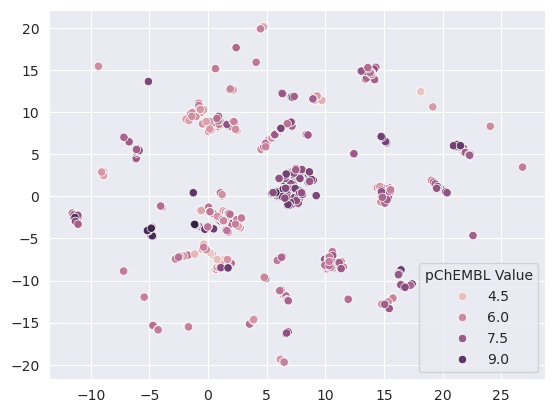

In [70]:
sns.scatterplot(x=u[:, 0], y=u[:, 1], hue=mtor['pChEMBL Value'])

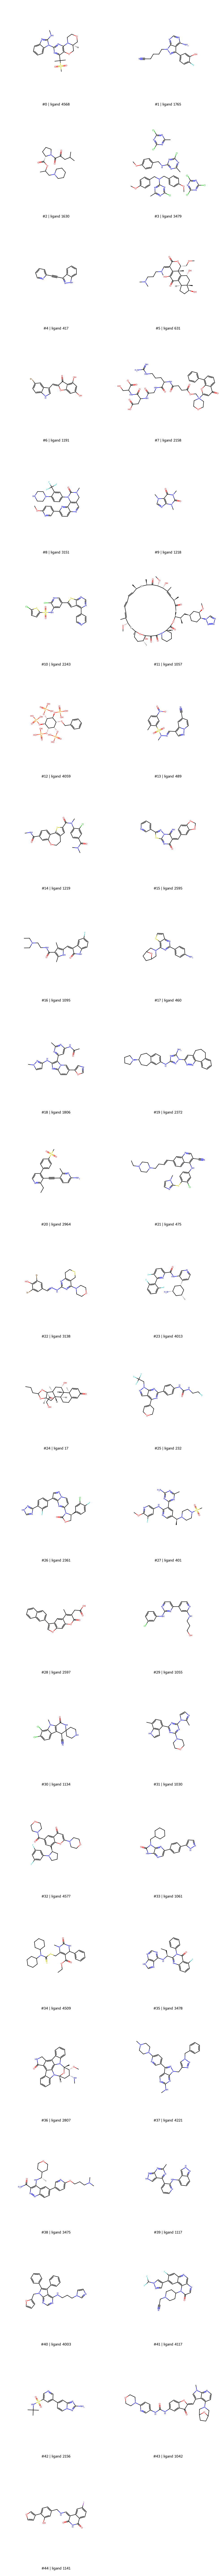

In [72]:
from rdkit import DataStructs
from rdkit.Chem.ReducedGraphs import TanimotoSimilarity

def distance_function(index1, index2, *args, fingerprints=mtor_fps,
                      metric=DataStructs.TanimotoSimilarity):
    return 1 - DataStructs.FingerprintSimilarity(fingerprints[index1],
                                                 fingerprints[index2],
                                                 metric=metric)


from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

picker = MaxMinPicker()
picked = list(picker.LazyPick(distance_function, len(mtor_fps), 45))  # 45 most different form the rest of ds
Draw.MolsToGridImage([Chem.MolFromSmiles(mtor['Smiles'][i]) for i in picked], molsPerRow=2, subImgSize=(500, 500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked)])

In [74]:
picked2 = list(picker.LazyBitVectorPick(mtor_fps, len(mtor_fps), 45))

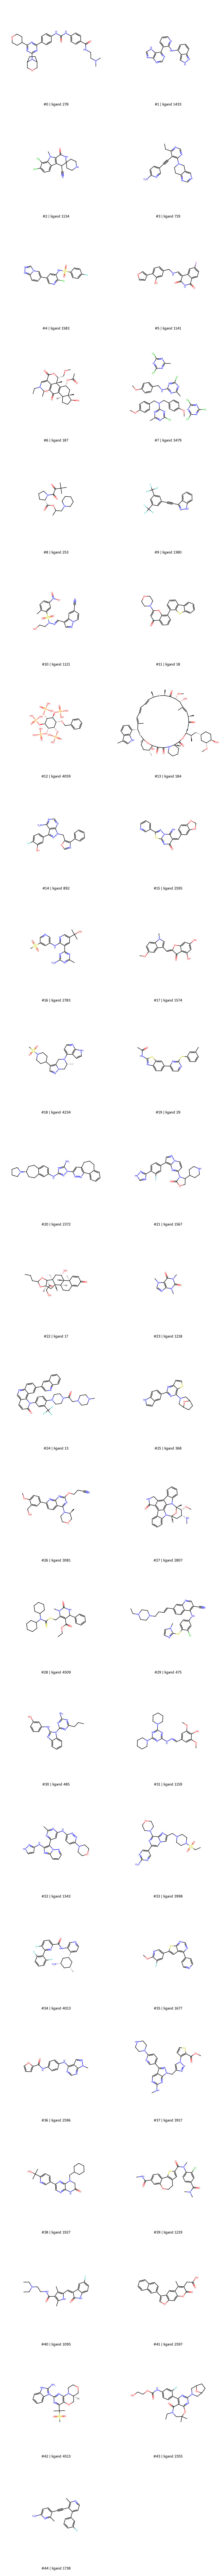

In [76]:
Draw.MolsToGridImage([Chem.MolFromSmiles(mtor['Smiles'][i]) for i in picked2], molsPerRow=2, subImgSize=(500, 500),
                     legends=["#{} | ligand {}".format(i, hit) for i, hit in enumerate(picked2)])

In [77]:
mtor['picked'] = mtor.index.isin(picked)
mtor['picked2'] =mtor.index.isin(picked2)

In [78]:
mtor

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,picked,picked2
0,CHEMBL1773577,NaN,0,443.49,0.0,3.65,40,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3)cc2s1,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN,False,False
1,CHEMBL1773561,NaN,0,390.47,0.0,4.60,24,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,IC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN,False,False
2,CHEMBL1773077,NaN,0,406.47,0.0,4.30,25,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,IC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN,False,False
3,CHEMBL1773580,NaN,0,443.49,0.0,3.65,43,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)n3)cc2s1,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN,False,False
4,CHEMBL1773578,NaN,0,457.51,0.0,3.68,41,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F)n3)cc2s1,IC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,CHEMBL4287809,NaN,0,426.43,0.0,2.71,14,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccccc1F,IC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN,False,False
4592,CHEMBL4280265,NaN,0,448.84,0.0,3.49,27,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4F)c3)cn12,IC50,'>',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4251704,1,Scientific Literature,ACS Med Chem Lett,2018,NaN,False,False
4593,CHEMBL4246563,NaN,0,407.43,0.0,4.92,16b,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc4c32)cc1,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4229497,1,Scientific Literature,Bioorg Med Chem,2018,NaN,False,False
4594,CHEMBL4244147,NaN,0,381.44,0.0,1.49,3c,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4229417,1,Scientific Literature,Bioorg Med Chem,2018,NaN,False,False
